In [43]:
import pandas as pd
import numpy as np
import requests
import json
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup


In [48]:
# da B3
# https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm

url = 'https://sistemaswebb3-listados.b3.com.br/indexProxy/indexCall/GetPortfolioDay/eyJpbmRleCI6IklCT1YiLCJsYW5ndWFnZSI6InB0LWJyIn0='

r = requests.get(url)
pd.json_normalize(json.loads(r.content))
comp_ibov =  pd.json_normalize(json.loads(r.content), record_path =['results'])
comp_ibov.drop(columns=['segment', 'partAcum'], inplace=True) # Not really necessary
comp_ibov.sort_values(by=['part'], ascending=False, inplace=True)
comp_ibov['part'] = comp_ibov['part'].apply(lambda x: float(x.replace(',', '.'))/100) # Also not necessary in this case
comp_ibov['theoricalQty'] = comp_ibov['theoricalQty'].apply(lambda x: int(x.replace('.', ''))) # Same as above
comp_ibov

,cod,asset,type,part,theoricalQty
65,PETR4,PETROBRAS,PN N2,0.06566,4566441248
51,ITUB4,ITAUUNIBANCO,PN EJ N1,0.06495,4799907051
12,BBDC4,BRADESCO,PN N1,0.04936,5156077326
64,PETR3,PETROBRAS,ON N2,0.04285,2684384823
7,B3SA3,B3,ON EDJ NM,0.03716,5901731302
...,...,...,...,...,...
27,CVCB3,CVC BRASIL,ON NM,0.00084,275967676
43,GOLL4,GOL,PN N2,0.00082,190059275
30,ECOR3,ECORODOVIAS,ON NM,0.00080,333657615
68,POSI3,POSITIVO TEC,ON NM,0.00044,73573028


<AxesSubplot:title={'center':'Composição do IBOV'}>

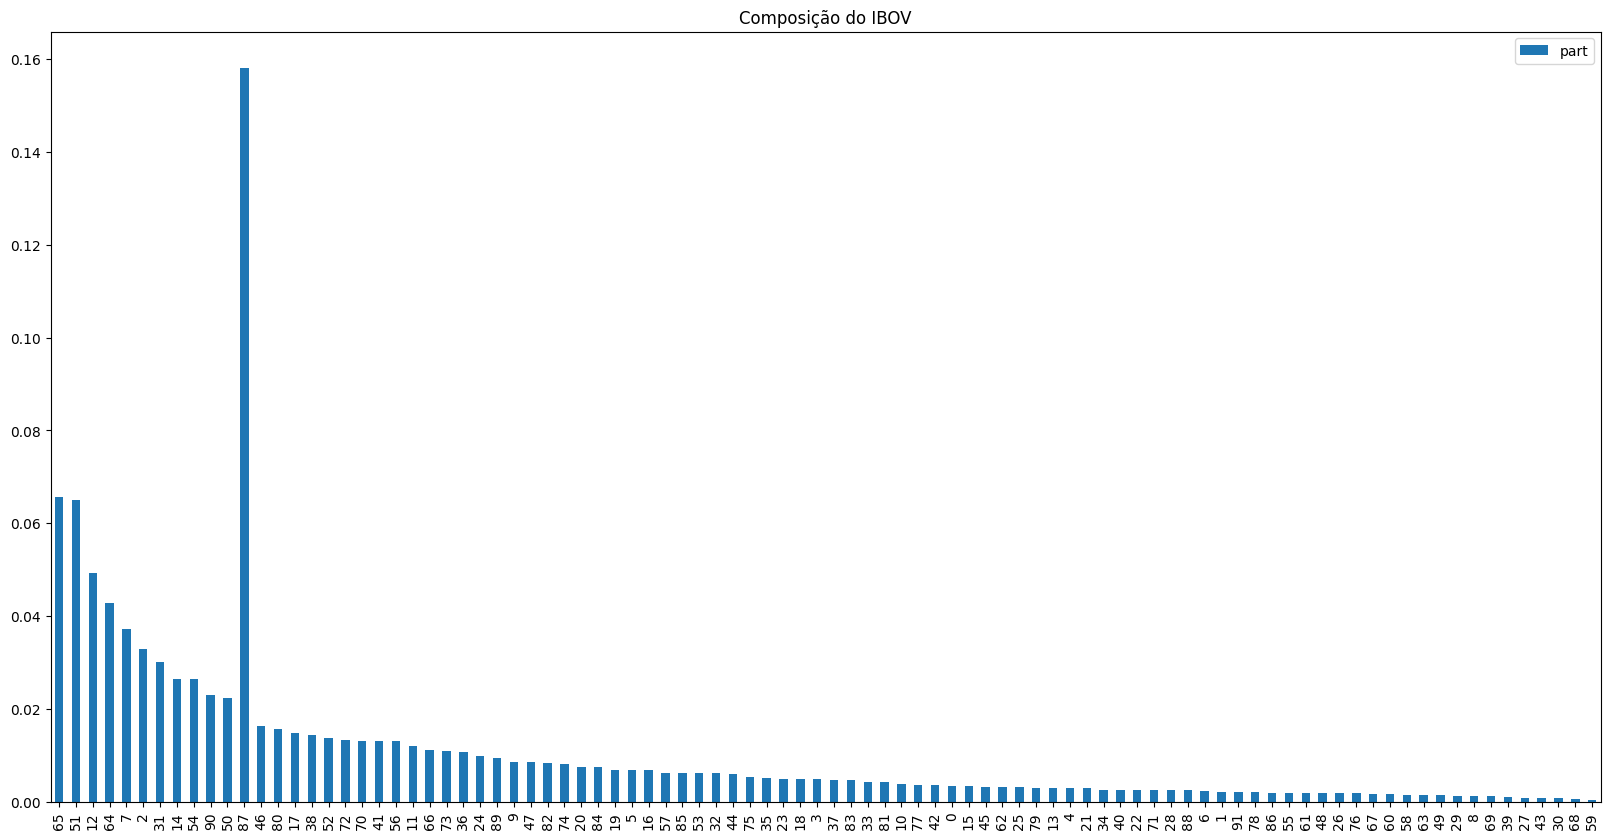

In [42]:
comp_ibov.plot( kind='bar', figsize=(20, 10), title='Composição do IBOV')

In [29]:
url = 'https://sistemaswebb3-listados.b3.com.br/indexProxy/indexCall/GetPortfolioDay/eyJpbmRleCI6IklCT1YiLCJsYW5ndWFnZSI6InB0LWJyIn0='

r = requests.get(url)
date = pd.json_normalize(json.loads(r.content))['header.date'][0]
date

'03/10/22'

In [7]:
#do infomoney

comp_ibov_im_url = 'https://www.infomoney.com.br/cotacoes/b3/indice/ibovespa/'

comp_ibov_im = pd.read_html(comp_ibov_im_url, decimal=',', thousands='.')[2:]
comp_ibov_im = pd.concat(comp_ibov_im).reset_index(drop=True)
comp_ibov_im.sort_values(by=['part'], ascending=False)

,Ativo,Último (R$),Var. Dia (%),Val. Min (R$),Val. Máx (R$),Data
0,ALPA4,20.38,4.37,20.03,21.57,17:07 30/09
1,AMER3,15.87,6.99,15.60,17.17,17:07 30/09
2,ARZZ3,96.45,2.02,95.20,99.00,17:07 30/09
3,AZUL4,14.42,2.08,14.11,14.94,17:07 30/09
4,B3SA3,12.60,3.57,12.36,13.18,17:07 30/09
...,...,...,...,...,...,...
87,PCAR3,19.57,-0.92,19.09,19.54,17:07 30/09
88,POSI3,12.54,-0.72,12.20,12.84,17:07 30/09
89,RDOR3,29.85,-0.44,28.96,30.18,17:07 30/09
90,SLCE3,43.41,-0.28,42.51,43.69,17:07 30/09


In [12]:
pd.read_html(comp_ibov_im_url, decimal=',', thousands='.')[0]

,0,1
0,Fechamento anterior,107664
1,Abertura,107664
2,Negócios,8300037
3,Volume,"$ 66,86 B"


In [13]:
pd.read_html(comp_ibov_im_url, decimal=',', thousands='.')[1]

,0,1
0,Mín — Máx (Dia),107.315 - 110.502
1,Variação (Dia),+2.2%
2,Variação (Mês),+0.46%
3,Variação (2022),+4.97%
4,Variação (52 semanas),-0.84%
